In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
df = pd.read_csv('forestCoverType.csv')

X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type'].copy()

y = y.astype(int)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (581012, 10)
Shape of y: (581012,)


In [3]:
df.dropna(axis=1)
df.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Cover_Type                            0
dtype: int64

In [4]:
features = df.drop("Cover_Type", axis=1)
target = df['Cover_Type'].values

In [5]:
sampler = RandomUnderSampler(random_state=42)
features, target = sampler.fit_resample(features, target)
print("Shape of X:", features.shape)
print("Shape of y:", target.shape)
pd.Series(target).value_counts()

Shape of X: (19229, 10)
Shape of y: (19229,)


1    2747
2    2747
3    2747
4    2747
5    2747
6    2747
7    2747
dtype: int64

In [6]:
df['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

df = pd.DataFrame(features, columns=["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points"])
df['Cover_Type'] = target
X = df.drop("Cover_Type", axis=1)
y = df['Cover_Type']
print("Shape of X after dropping 'Cover_Type':", X.shape)

Shape of X after dropping 'Cover_Type': (19229, 10)


In [8]:
df['Cover_Type'].value_counts()

1    2747
2    2747
3    2747
4    2747
5    2747
6    2747
7    2747
Name: Cover_Type, dtype: int64

In [9]:
# reducing dataset
X, X_test, y, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

print('Train dataset:', X_train.shape[0])
print('Validation dataset:', X_val.shape[0])
print('Test dataset:', X_test.shape[0])

Train dataset: 3921
Validation dataset: 693
Test dataset: 1154


1
2
3
4
5
6
7
8


C:\Users\Nasir Khurshid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


9
10


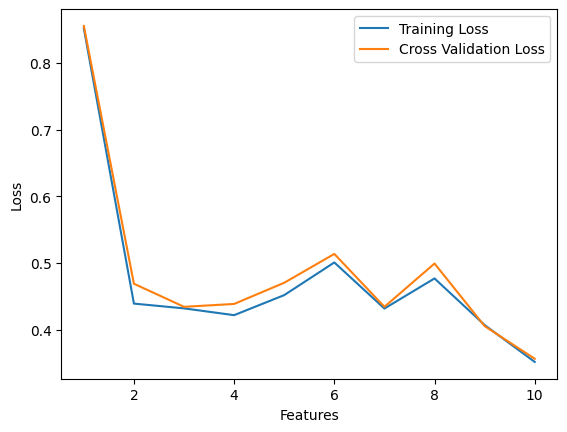

In [10]:
trainingLoss= []
testLoss = []
cvLoss = []
features = range(1, 11)

for n in features:
    print(n)
    selector = SelectKBest(mutual_info_classif, k=n)
    selector.fit(X_train, y_train)
    selectedFeatures = X_train.columns[selector.get_support()]
    XtrainSelected = X_train[selectedFeatures]
    XtestSelected = X_test[selectedFeatures]
    XvalSelected = X_val[selectedFeatures]

    logisticRegressor = LogisticRegression(max_iter=10000)
    logisticRegressor.fit(XtrainSelected, y_train)

    trainingLoss.append(1 - logisticRegressor.score(XtrainSelected, y_train))
    testLoss.append(1 - logisticRegressor.score(XtestSelected, y_test))
    cvLoss.append(1 - logisticRegressor.score(XvalSelected, y_val))

plt.plot(features, trainingLoss, label="Training Loss")
plt.plot(features, cvLoss, label="Cross Validation Loss")
plt.xlabel("Features")
plt.ylabel("Loss")
plt.legend()
plt.show()

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


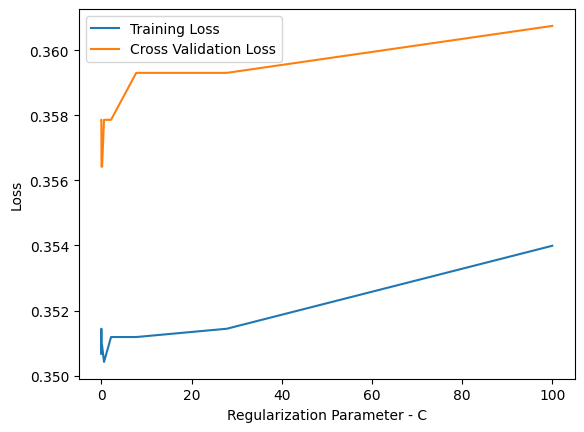

In [31]:
trainingLoss= []
testLoss = []
cvLoss = []
regularizedParam = np.logspace(-3, 5, num=11)

for c in regularizedParam:
    print(c)
    logisticRegressor = LogisticRegression(max_iter=10000, C=1/c)

    logisticRegressor.fit(X_train, y_train)

    trainingLoss.append(1 - logisticRegressor.score(X_train, y_train))
    testLoss.append(1 - logisticRegressor.score(X_test, y_test))
    cvLoss.append(1 - logisticRegressor.score(X_val, y_val))

plt.plot(regularizedParam, trainingLoss, label="Training Loss")
plt.plot(regularizedParam, cvLoss, label="Cross Validation Loss")
plt.xlabel("Regularization Parameter - C")
plt.ylabel("Loss")
plt.legend()
plt.show()

0.1


C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_15828\804779674.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yTrainSubset = y_train[:noTrain]
C:\Users\Nasir Khurshid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nasir Khurshid\AppData\Lo

0.25
0.4


C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_15828\804779674.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yTrainSubset = y_train[:noTrain]


0.5499999999999999


C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_15828\804779674.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yTrainSubset = y_train[:noTrain]


0.7


C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_15828\804779674.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yTrainSubset = y_train[:noTrain]


0.85


C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_15828\804779674.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yTrainSubset = y_train[:noTrain]


1.0


C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_15828\804779674.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yTrainSubset = y_train[:noTrain]


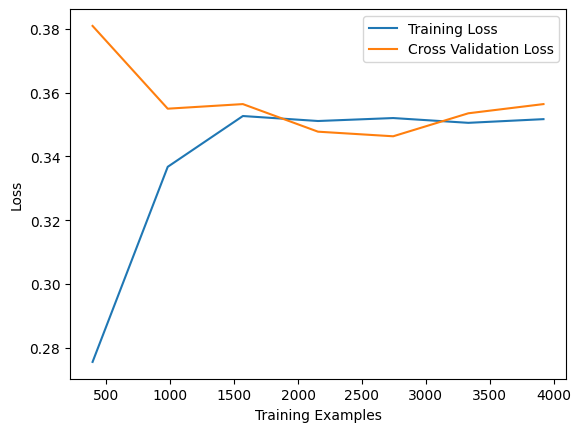

In [12]:
trainingLoss= []
testLoss = []
cvLoss = []
trainSize = np.linspace(0.1, 1.0, num=7)

for trainingsize in trainSize:
    print(trainingsize)
    noTrain = int(trainingsize * X_train.shape[0])

    XtrainSubset = X_train[:noTrain]
    yTrainSubset = y_train[:noTrain]

    logisticRegressor = LogisticRegression(max_iter=10000)

    logisticRegressor.fit(XtrainSubset, yTrainSubset)

    trainingLoss.append(1 - logisticRegressor.score(XtrainSubset, yTrainSubset))
    testLoss.append(1 - logisticRegressor.score(X_test, y_test))
    cvLoss.append(1 - logisticRegressor.score(X_val, y_val))

plt.plot(trainSize * X_train.shape[0], trainingLoss, label="Training Loss")
plt.plot(trainSize * X_train.shape[0], cvLoss, label="Cross Validation Loss")
plt.xlabel("Training Examples")
plt.ylabel("Loss")
plt.legend()
plt.show()

1
2
3
4
5
6
7
8
9
10


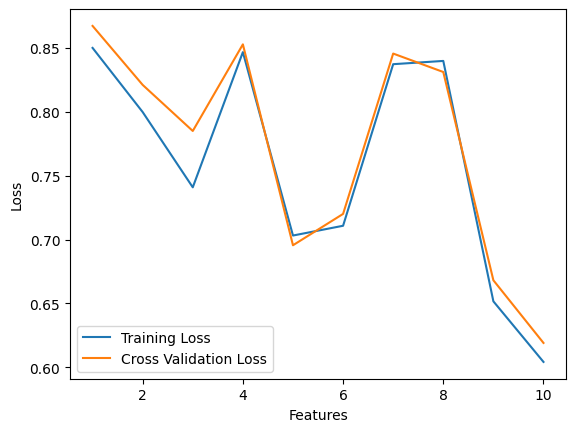

In [29]:
trainingLoss= []
testLoss = []
cvLoss = []
features = range(1, 11)

for f in features:
    print(f)
    selector = SelectKBest(mutual_info_classif, k=f)
    selector.fit(X_train, y_train)
    selectedFeatures = X_train.columns[selector.get_support()]
    XtrainSelected = X_train[selectedFeatures]
    XtestSelected = X_test[selectedFeatures]
    XvalSelected = X_val[selectedFeatures]

    model = MLPClassifier(hidden_layer_sizes=(7,), max_iter=10000)
    model.fit(XtrainSelected, y_train)
    
    trainingLoss.append(1 - model.score(XtrainSelected, y_train))
    testLoss.append(1 - model.score(XtestSelected, y_test))
    cvLoss.append(1 - model.score(XvalSelected, y_val))

plt.plot(features, trainingLoss, label="Training Loss")
plt.plot(features, cvLoss, label="Cross Validation Loss")
plt.xlabel("Features")
plt.ylabel("Loss")
plt.legend()
plt.show()

1e-05
0.0001291549665014884
0.0016681005372000592
0.021544346900318846
0.2782559402207126
3.593813663804626
46.41588833612782
599.4842503189421
7742.636826811277
100000.0


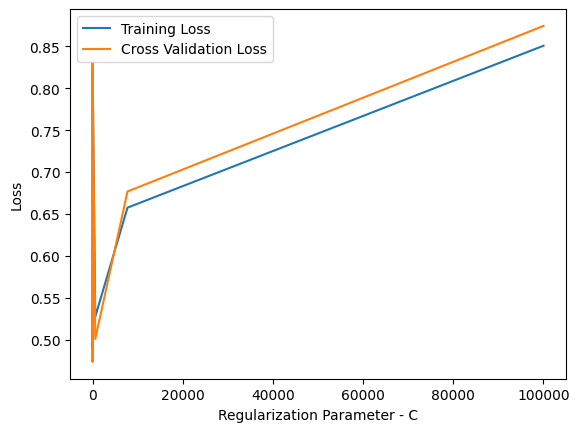

In [27]:
trainingLoss= []
testLoss = []
cvLoss = []
regularizedParam = np.logspace(-5, 5, num=10)

for c in regularizedParam:
    print(c)
    model = MLPClassifier(hidden_layer_sizes=(7,), max_iter=10000, alpha=c)
    model.fit(X_train, y_train)
    
    trainingLoss.append(1 - model.score(X_train, y_train))
    testLoss.append(1 - model.score(X_test, y_test))
    cvLoss.append(1 - model.score(X_val, y_val))

plt.plot(regularizedParam, trainingLoss, label="Training Loss")
plt.plot(regularizedParam, cvLoss, label="Cross Validation Loss")
plt.xlabel("Regularization Parameter - C")
plt.ylabel("Loss")
plt.legend()
plt.show()

0.1


C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_15828\4042721102.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yTrainSubset = y_train[:noTrain]


0.25


C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_15828\4042721102.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yTrainSubset = y_train[:noTrain]


0.4


C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_15828\4042721102.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yTrainSubset = y_train[:noTrain]


0.5499999999999999


C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_15828\4042721102.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yTrainSubset = y_train[:noTrain]


0.7


C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_15828\4042721102.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yTrainSubset = y_train[:noTrain]


0.85


C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_15828\4042721102.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yTrainSubset = y_train[:noTrain]


1.0


C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_15828\4042721102.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yTrainSubset = y_train[:noTrain]


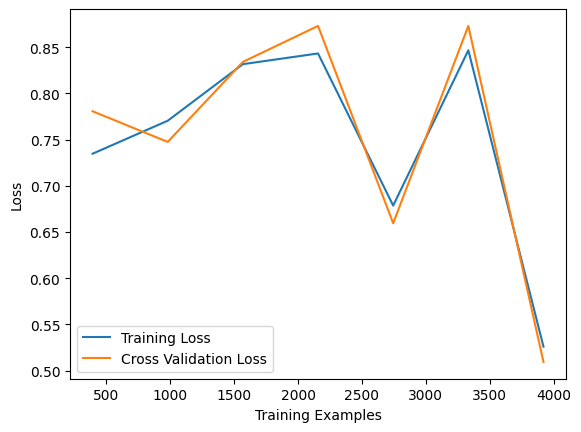

In [26]:
trainingLoss= []
testLoss = []
cvLoss = []
trainSize = np.linspace(0.1, 1.0, num=7)


for trainingSize in trainSize:
    print(trainingSize)
    noTrain = int(trainingSize * X_train.shape[0])

    XtrainSubset = X_train[:noTrain]
    yTrainSubset = y_train[:noTrain]

    model = MLPClassifier(hidden_layer_sizes=(7,), max_iter=10000)
    model.fit(X_train, y_train)    

    trainingLoss.append(1 - model.score(XtrainSubset, yTrainSubset))
    testLoss.append(1 - model.score(X_test, y_test))
    cvLoss.append(1 - model.score(X_val, y_val))

plt.plot(trainSize * X_train.shape[0], trainingLoss, label="Training Loss")
plt.plot(trainSize * X_train.shape[0], cvLoss, label="Cross Validation Loss")
plt.xlabel("Training Examples")
plt.ylabel("Loss")
plt.legend()
plt.show()